In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
data_b = pd.read_csv('./data/B.txt', header=None, prefix = 'X', delimiter=' ')
data_b['is_selected'] = False

In [3]:
data_b

,X0,X1,is_selected
0,1.4629,1.7974,False
1,1.4984,1.5395,False
2,0.5565,0.7249,False
3,0.8081,1.9161,False
4,1.4016,0.8231,False
...,...,...,...
213,1.4274,1.7278,False
214,0.8145,1.3389,False
215,1.0242,1.8874,False
216,0.3210,1.7564,False


In [4]:
data_b['co-ord'] = list(zip(data_b['X0'],data_b['X1']))
data_b.head()

,X0,X1,is_selected,co-ord
0,1.4629,1.7974,False,"(1.4629, 1.7974)"
1,1.4984,1.5395,False,"(1.4984, 1.5395)"
2,0.5565,0.7249,False,"(0.5565, 0.7249)"
3,0.8081,1.9161,False,"(0.8081, 1.9161)"
4,1.4016,0.8231,False,"(1.4016, 0.8231)"


In [5]:
selectedData = {'points' : 
                [
                    {'x': 1.4629,
                     'y': 1.7974},
                    {'x': 1.4984,
                     'y': 1.5395},
                    {'x': 0.5565,
                     'y': 0.7249}]
               }
s_data = json.dumps(selectedData, indent=2)
#print(s_data)
if s_data != 'null':
    selected = json.loads(s_data)
    temp_x = []
    temp_y = []
    for point in selected['points']:
        #return point
        tp = (point['x'],point['y'])
        print(tp)
        #--- update the is_selected column
        #data_b['is_selected'] = np.where(data_b['co-ord'] == tp, True, False)
        data_b.loc[data_b['co-ord'] == (point['x'],point['y']),'is_selected'] =  True
        #point['x']
        #point['y']
        temp_x.append(point['x'])
        temp_y.append(point['y'])
        #points = s_data['points']
    pointsdict = {
                'x' : temp_x,
                'y' : temp_y 
    }
    
data_b.head()

(1.4629, 1.7974)
(1.4984, 1.5395)
(0.5565, 0.7249)


,X0,X1,is_selected,co-ord
0,1.4629,1.7974,True,"(1.4629, 1.7974)"
1,1.4984,1.5395,True,"(1.4984, 1.5395)"
2,0.5565,0.7249,True,"(0.5565, 0.7249)"
3,0.8081,1.9161,False,"(0.8081, 1.9161)"
4,1.4016,0.8231,False,"(1.4016, 0.8231)"


In [6]:
f_value=1
data_b['y_new'] = np.where(data_b['is_selected']==True, data_b['X1']+float(f_value), data_b['X1'])
data_b.head()

,X0,X1,is_selected,co-ord,y_new
0,1.4629,1.7974,True,"(1.4629, 1.7974)",2.7974
1,1.4984,1.5395,True,"(1.4984, 1.5395)",2.5395
2,0.5565,0.7249,True,"(0.5565, 0.7249)",1.7249
3,0.8081,1.9161,False,"(0.8081, 1.9161)",1.9161
4,1.4016,0.8231,False,"(1.4016, 0.8231)",0.8231


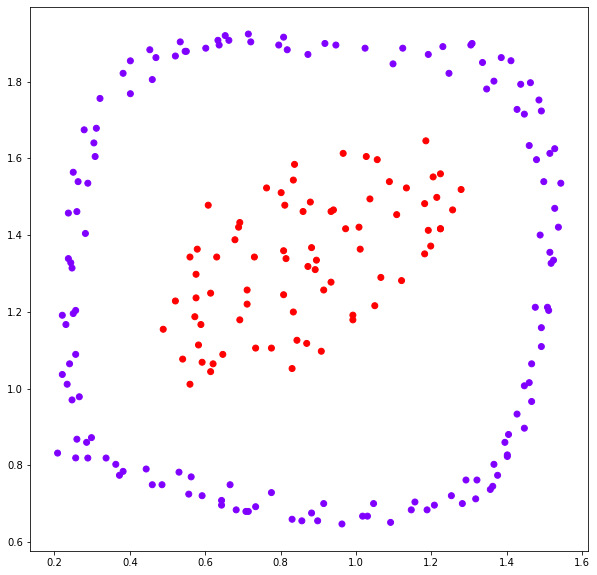

In [10]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt        #--- for plotting the data

#----- validating agglomerative clustering values for all the above 
ac1 = AgglomerativeClustering(n_clusters = 2, linkage='single') 
  
# Visualizing the clustering 
plt.figure(figsize =(10, 10)) 
plt.scatter(data_b['X0'], data_b['X1'],  
           c = ac1.fit_predict(data_b[['X0','X1']]), cmap ='rainbow') 
plt.show()

In [12]:
c = ac1.fit_predict(data_b[['X0','X1']])
c

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])